In [36]:
import pandas as pd
import numpy as np

In [37]:
covid_data = pd.read_csv("/kaggle/input/covid-19-case-surveillance/data.csv")

/tmp/ipykernel_33/1315716703.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_data = pd.read_csv("/kaggle/input/covid-19-case-surveillance/data.csv")


In [38]:
household_data=pd.read_csv('/kaggle/input/household-pulse-survey/pulse_puf_most_recent.csv')

In [39]:
covid_data = covid_data.dropna(subset=['race','ethnicity','case_positive_specimen_interval', 'case_onset_interval', 'exposure_yn', 'symptom_status', 'hosp_yn', 'icu_yn', 'death_yn', 'underlying_conditions_yn'])
covid_data = covid_data[~covid_data.isin(['Missing', 'Unknown','NaN',' ','']).any(axis=1)]



In [40]:
covid_data.head(40)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
1500,2020-07,UT,49.0,SALT LAKE,49035.0,0 - 17 years,Male,White,Hispanic/Latino,0.0,0.0,Multiple,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
4354,2022-01,NV,32.0,CLARK,32003.0,18 to 49 years,Male,White,Non-Hispanic/Latino,1.0,0.0,Multiple,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
7103,2020-11,NV,32.0,CLARK,32003.0,50 to 64 years,Male,White,Non-Hispanic/Latino,0.0,0.0,Multiple,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
7411,2020-11,NV,32.0,CLARK,32003.0,50 to 64 years,Male,White,Non-Hispanic/Latino,0.0,0.0,Routine surveillance,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
7419,2020-11,NV,32.0,CLARK,32003.0,50 to 64 years,Male,White,Non-Hispanic/Latino,0.0,0.0,Routine surveillance,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
7750,2020-11,NV,32.0,CLARK,32003.0,50 to 64 years,Male,White,Non-Hispanic/Latino,0.0,0.0,Routine surveillance,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
7758,2020-11,NV,32.0,CLARK,32003.0,50 to 64 years,Male,White,Non-Hispanic/Latino,0.0,0.0,Multiple,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
7820,2020-11,NV,32.0,CLARK,32003.0,50 to 64 years,Male,White,Non-Hispanic/Latino,0.0,0.0,Routine surveillance,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
8475,2020-11,NV,32.0,CLARK,32003.0,50 to 64 years,Male,White,Non-Hispanic/Latino,0.0,0.0,Routine surveillance,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes
8548,2020-11,NV,32.0,CLARK,32003.0,50 to 64 years,Male,White,Non-Hispanic/Latino,0.0,0.0,Routine surveillance,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes


In [41]:

household_data = household_data.dropna(subset=['egender', 'agender', 'rhispanic', 'rrace','eipspnd1', 'eipspnd2', 'eipspnd3', 'eipspnd4', 'eipspnd5', 'eipspnd6', 'eipspnd7', 'eipspnd8', 'eipspnd9', 'eipspnd10', 'eipspnd11', 'eipspnd12', 'eipspnd13'])
household_data = household_data[~household_data.isin(['NaN',' ','']).any(axis=1)]

In [42]:
household_data = household_data.dropna(subset=['est_msa'])

In [43]:
household_data.head(10)

,scram,week_x,est_st,est_msa,pweight,tbirth_year,abirth_year,egender,agender,rhispanic,...,eipspnd4,eipspnd5,eipspnd6,eipspnd7,eipspnd8,eipspnd9,eipspnd10,eipspnd11,eipspnd12,eipspnd13
538953,V050000004S70040487000121,7,42,37980.0,11169.979425,1990,2,1,2,1,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
538959,V050010062M32132513710111,7,13,12060.0,13493.172313,1961,2,2,2,1,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
538960,V050010062M76130638400121,7,13,12060.0,17676.732201,1981,2,1,2,1,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
538961,V050010062M98130108500111,7,13,12060.0,7486.021100,1947,2,1,2,1,...,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0
538962,V050010062M98130502600111,7,13,12060.0,5973.805125,1978,2,2,2,1,...,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0
538963,V050010464M12250900700111,7,25,14460.0,7350.966240,1960,2,2,2,1,...,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0
538968,V050020002S30221870910111,7,51,47900.0,2686.186714,1955,2,1,2,1,...,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0
538979,V050030081M73060941400121,7,6,31080.0,23708.532015,1987,2,1,2,2,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0
538980,V050030103M99120446910121,7,12,33100.0,3399.209735,1947,2,2,2,1,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
538981,V050030625M13340475900121,7,34,35620.0,28817.086179,1964,2,1,2,1,...,-99.0,-99.0,-99.0,1.0,-99.0,-99.0,1.0,-99.0,-99.0,-99.0


# Use the appropriate statistics and plots to investigate the following:


# 1. The total number of hospitalizations versus deaths from COVID-19 over the entire US per month-year timestamp.

**1.Get the count of cases with hospitalization per month.**

**2.Get the count of deaths per month.**

**3.Merge the two DataFrames on the 'case_month' column.**

**4.Fill in missing values with 0.**


In [44]:

hosp_counts = covid_data[covid_data['hosp_yn'] == 'Yes'].groupby('case_month')['hosp_yn'].count().reset_index(name='hosp_count')
deaths_counts = covid_data[covid_data['death_yn'] == 'Yes'].groupby('case_month')['death_yn'].count().reset_index(name='deaths_count')
hosp_deaths_monthly = pd.merge(hosp_counts, deaths_counts, on='case_month', how='outer')
hosp_deaths_monthly = hosp_deaths_monthly.fillna(0)
hosp_deaths_monthly.head(10)

,case_month,hosp_count,deaths_count
0,2020-03,116,13.0
1,2020-04,181,60.0
2,2020-05,85,19.0
3,2020-06,77,7.0
4,2020-07,128,24.0
5,2020-08,91,21.0
6,2020-09,104,9.0
7,2020-10,190,25.0
8,2020-11,228,44.0
9,2020-12,200,73.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

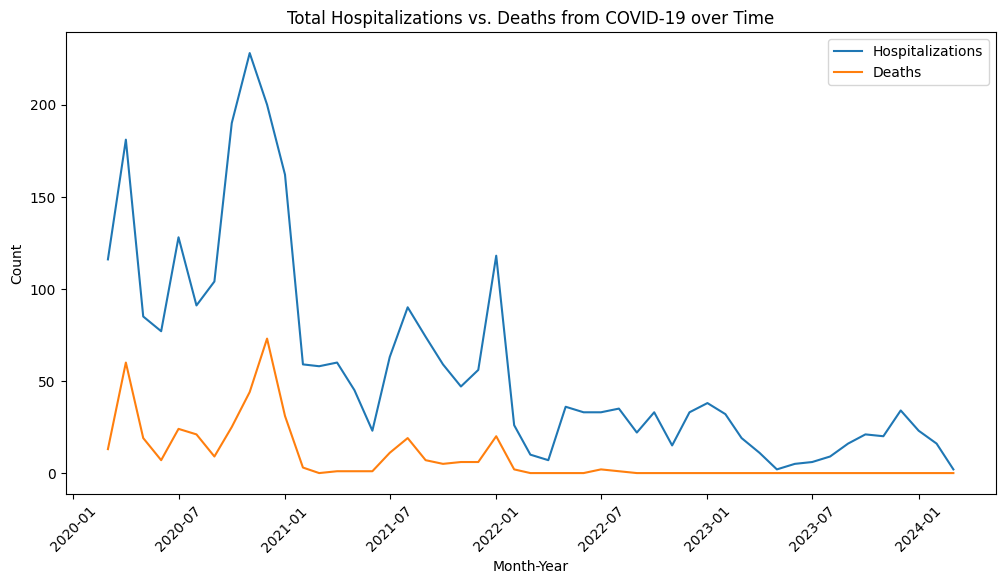

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
hosp_deaths_monthly['case_month'] = pd.to_datetime(hosp_deaths_monthly['case_month'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='case_month', y='hosp_count', data=hosp_deaths_monthly, label='Hospitalizations')
sns.lineplot(x='case_month', y='deaths_count', data=hosp_deaths_monthly, label='Deaths')
plt.title('Total Hospitalizations vs. Deaths from COVID-19 over Time')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**The resulting graph show the largest number were hospitalized in january 2021 or in december 2021 almost and the largest number of deaths was before jan 2021**

# 2. The average rates of COVID-related deaths relative to patient demographics


**1. Get the total number of deaths by sex**


**2. Get the total number of deaths by race**

**3. Get the percentage of deaths and hospitalizations by age group**

In [46]:
total_of_death = covid_data[covid_data['death_yn'] == 'Yes']
deaths_by_sex = total_of_death.groupby('sex')['death_yn'].count()
deaths_by_sex_pct = ((deaths_by_sex / total_of_death['sex'].count())*100).round(2).fillna(0)
print("Deaths by Sex:")
print(deaths_by_sex_pct)



Deaths by Sex:
sex
Female    46.23
Male      53.77
Name: death_yn, dtype: float64


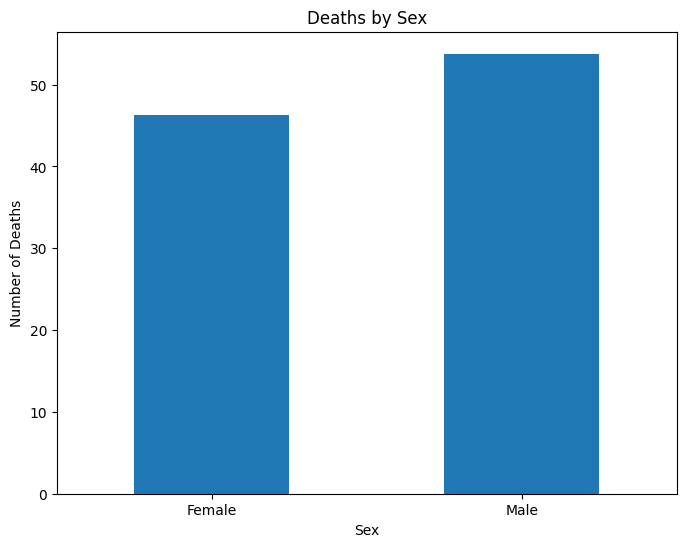

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
deaths_by_sex_pct.plot(kind='bar')
plt.title('Deaths by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=0)
plt.show()

**The results show that 53.77% of the deaths were among males, while 46.23% were among females. This suggests that males were more affected by COVID-19 in terms of mortality.**

In [48]:
deaths_by_race = total_of_death.groupby('race')['death_yn'].count()
deaths_by_race_pct = ((deaths_by_race /total_of_death['race'].count())*100).round(2)
print("Deaths by Race:")
print(deaths_by_race_pct)

Deaths by Race:
race
Asian     2.92
Black     5.11
White    91.97
Name: death_yn, dtype: float64


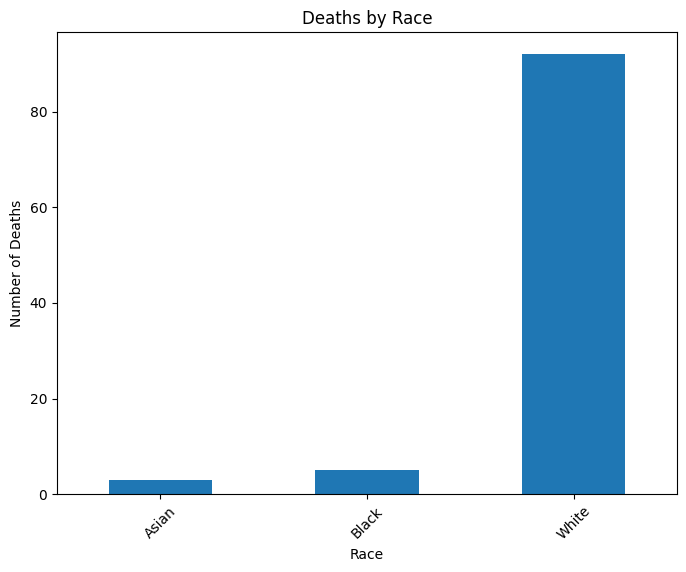

In [49]:
plt.figure(figsize=(8, 6))
deaths_by_race_pct.plot(kind='bar')
plt.title('Deaths by Race')
plt.xlabel('Race')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

**The results indicate that the majority of deaths (91.97%) were among White individuals, followed by Black (5.11%) and Asian (2.92%) individuals.**

In [50]:
deaths_by_age = total_of_death.groupby('age_group')['death_yn'].count()
deaths_by_age_pct = ((deaths_by_age /total_of_death['age_group'].count())*100).round(2)
print("Deaths by Age:")
print(deaths_by_age_pct)

Deaths by Age:
age_group
18 to 49 years     1.22
50 to 64 years     8.52
65+ years         90.27
Name: death_yn, dtype: float64


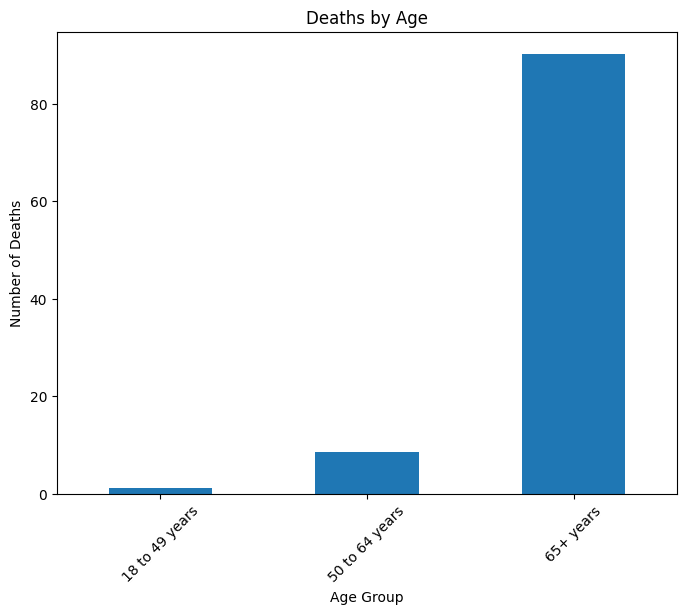

In [51]:
plt.figure(figsize=(8, 6))
deaths_by_age_pct.plot(kind='bar')
plt.title('Deaths by Age')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

**The results show that the majority of deaths (90.27%) occurred among individuals aged 65 years and above, while 8.52% were in the 50-64 years age group, and only 1.22% were in the 18-49 years age group.**

# 3. The rates of COVID-related hospitalization and death with age (across age groups).

In [52]:
covid_data.groupby(by="age_group").count().loc[:,['death_yn', 'hosp_yn']]

,death_yn,hosp_yn
age_group,,
0 - 17 years,729,729
18 to 49 years,6060,6060
50 to 64 years,3280,3280
65+ years,4118,4118


In [55]:

age_group_counts = covid_data.groupby(by='age_group').count().loc[:,['death_yn', 'hosp_yn']]
age_group_rates =((age_group_counts /covid_data.loc[:,['death_yn', 'hosp_yn']].count()*100).round(2)) 

print("COVID-related Hospitalization and Death Rates by Age Group:")
print(age_group_rates)

COVID-related Hospitalization and Death Rates by Age Group:
                death_yn  hosp_yn
age_group                        
0 - 17 years        5.14     5.14
18 to 49 years     42.72    42.72
50 to 64 years     23.12    23.12
65+ years          29.03    29.03


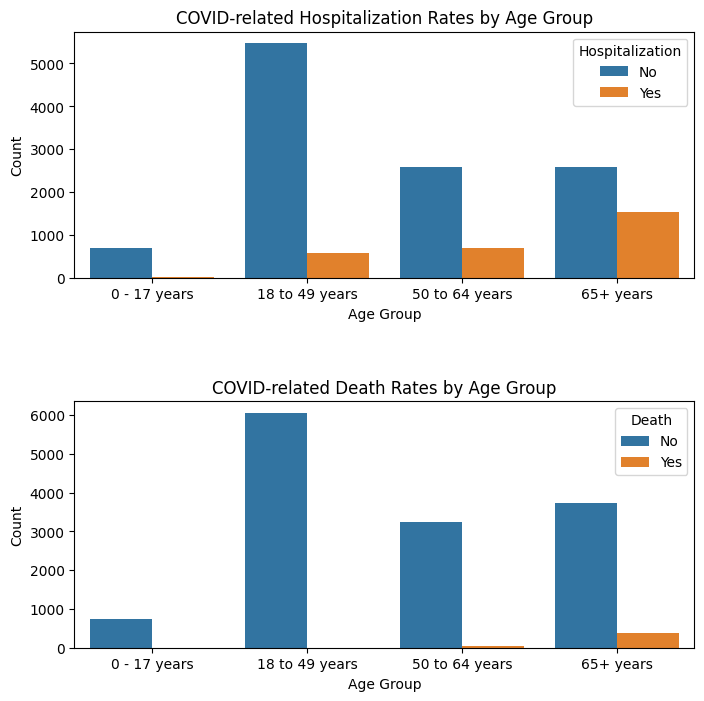

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
sns.countplot(x='age_group', data=covid_data, hue='hosp_yn', ax=ax1)
ax1.set_title('COVID-related Hospitalization Rates by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.legend(title='Hospitalization')
sns.countplot(x='age_group', data=covid_data, hue='death_yn', ax=ax2)
ax2.set_title('COVID-related Death Rates by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Count')
ax2.legend(title='Death')
plt.subplots_adjust(hspace=0.5)
plt.show()

**0-17 years age group:This age group had the lowest hospitalization and death rates .
This suggests that younger individuals were less severely affected by COVID-19 compared to older age groups.**
**65+ years age group:This age group had hospitalization and death rates .**

**65+ years ago is lowest rate accroding to its number and high in hospitalization**


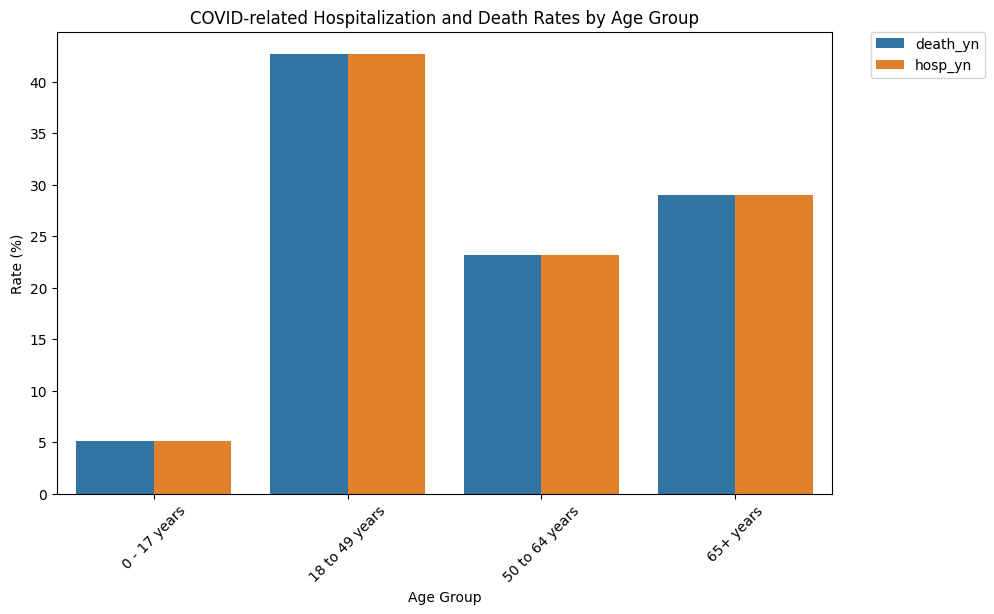

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(age_group_rates)
df = df.reset_index()
df_melted = df.melt(id_vars='age_group', var_name='metric', value_name='rate')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='age_group', y='rate', hue='metric', data=df_melted, ax=ax)
ax.set_title('COVID-related Hospitalization and Death Rates by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Rate (%)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.show()

# 4. Average rate of COVID-related hospitalization and death per state over the entire study period.

In [58]:
total_deaths = covid_data['death_yn'].count()
total_hospitalizations = covid_data['hosp_yn'].count()
state_group_counts = covid_data.groupby(by='res_state').count().loc[:,['death_yn', 'hosp_yn']]
state_group_rates = (state_group_counts /total_deaths) 
print(state_group_rates)

           death_yn   hosp_yn
res_state                    
AK         0.000211  0.000211
CO         0.002185  0.002185
GU         0.000211  0.000211
IA         0.098752  0.098752
ID         0.005921  0.005921
IN         0.010221  0.010221
KS         0.136956  0.136956
KY         0.025798  0.025798
LA         0.000211  0.000211
ME         0.023754  0.023754
MO         0.000211  0.000211
MS         0.004370  0.004370
NE         0.000141  0.000141
NV         0.221893  0.221893
OH         0.004864  0.004864
OR         0.033763  0.033763
PA         0.000070  0.000070
PR         0.000141  0.000141
TN         0.000070  0.000070
TX         0.000070  0.000070
UT         0.145203  0.145203
VA         0.284486  0.284486
VI         0.000211  0.000211
VT         0.000282  0.000282


**1.Calculating the total number of deaths and hospitalizations**

**2. Calculating the hospitalization rates by state**

**3. Calculating the death rates by state**


In [59]:
total_deaths = covid_data['death_yn'].count()
total_hospitalizations = covid_data['hosp_yn'].count()

# Group the data by state and create a new DataFrame with 'yes' and 'no' columns for hosp_yn
state_group_counts = covid_data.groupby(by='res_state')['hosp_yn'].value_counts().unstack(fill_value=0)
state_group_rates = (state_group_counts / total_hospitalizations)

# Rename the columns
state_group_rates.columns

print(state_group_rates)



hosp_yn          No       Yes
res_state                    
AK         0.000000  0.000211
CO         0.001057  0.001128
GU         0.000000  0.000211
IA         0.090646  0.008106
ID         0.000000  0.005921
IN         0.000000  0.010221
KS         0.124410  0.012547
KY         0.000352  0.025446
LA         0.000000  0.000211
ME         0.000000  0.023754
MO         0.000211  0.000000
MS         0.000000  0.004370
NE         0.000000  0.000141
NV         0.187143  0.034750
OH         0.004300  0.000564
OR         0.000352  0.033411
PA         0.000000  0.000070
PR         0.000000  0.000141
TN         0.000070  0.000000
TX         0.000070  0.000000
UT         0.138578  0.006626
VA         0.251850  0.032636
VI         0.000000  0.000211
VT         0.000000  0.000282


In [60]:


state_group_counts1 = covid_data.groupby(by='res_state')['death_yn'].value_counts().unstack(fill_value=0)
state_group_rates1 = (state_group_counts1 / total_deaths)

state_group_rates1.columns

print(state_group_rates1)

death_yn         No       Yes
res_state                    
AK         0.000211  0.000000
CO         0.001903  0.000282
GU         0.000211  0.000000
IA         0.096920  0.001833
ID         0.004370  0.001551
IN         0.008529  0.001692
KS         0.134489  0.002467
KY         0.021640  0.004159
LA         0.000000  0.000211
ME         0.022838  0.000916
MO         0.000211  0.000000
MS         0.004300  0.000070
NE         0.000141  0.000000
NV         0.211038  0.010855
OH         0.004864  0.000000
OR         0.031367  0.002397
PA         0.000070  0.000000
PR         0.000141  0.000000
TN         0.000070  0.000000
TX         0.000070  0.000000
UT         0.143794  0.001410
VA         0.283358  0.001128
VI         0.000211  0.000000
VT         0.000282  0.000000


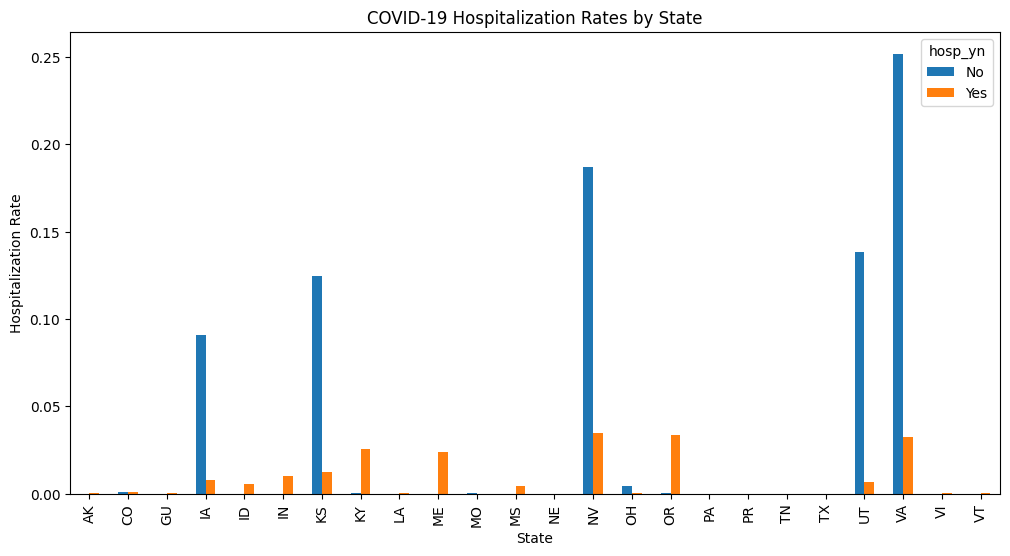

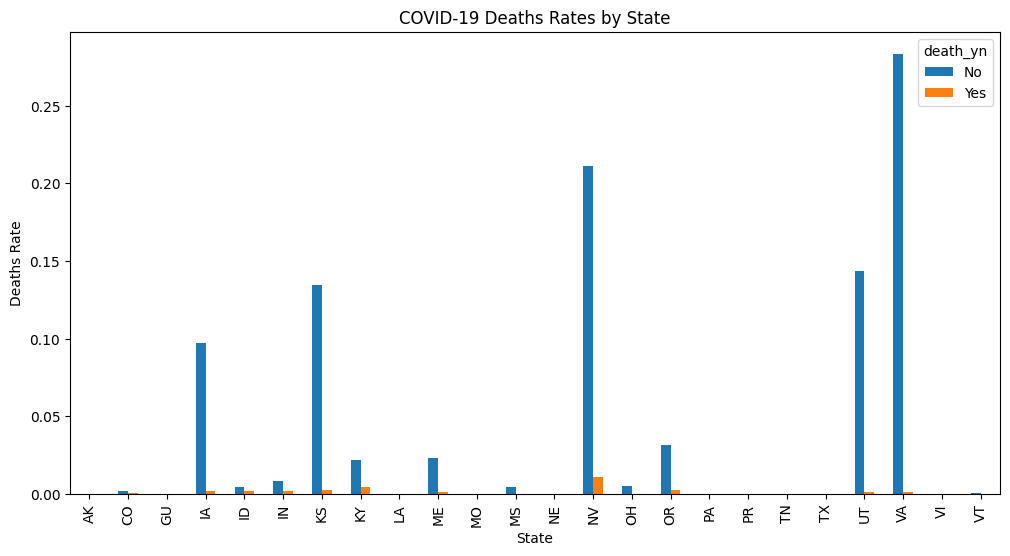

In [61]:
state_group_rates.plot(kind='bar', figsize=(12, 6))
plt.title('COVID-19 Hospitalization Rates by State')
plt.xlabel('State')
plt.ylabel('Hospitalization Rate')


state_group_rates1.plot(kind='bar', figsize=(12, 6))
plt.title('COVID-19 Deaths Rates by State')
plt.xlabel('State')
plt.ylabel('Deaths Rate')
plt.show()

**The state with the highest rate of deaths for non-hospitalized individuals appears to be Virginia (VA) at 0.251850.**

**The state with the highest rate of deaths for hospitalized individuals appears to be Kentucky (KY) at 0.025446.**

**Some states, like Tennessee (TN) and Texas (TX), have very low death rates overall, both for hospitalized and non-hospitalized individuals.**

# 5. The relationship between age, pre-existing medical conditions and/or risk behaviors, and rate of admittance to the ICU.

In [62]:
covid_data[covid_data['icu_yn'] == 'Yes'].groupby(by="age_group").count().loc[:,['icu_yn']]




,icu_yn
age_group,
0 - 17 years,12
18 to 49 years,133
50 to 64 years,174
65+ years,387


1.Filters the covid_data DataFrame to only include rows where icu_yn is 'Yes', meaning the patient was admitted to the ICU.

2. Groups the filtered data by the 'underlying_conditions_yn' column, which indicates whether the patient had any underlying conditions.

3. Counts the number of rows in each group using the .count() method.

4. Selects only the 'icu_yn' column

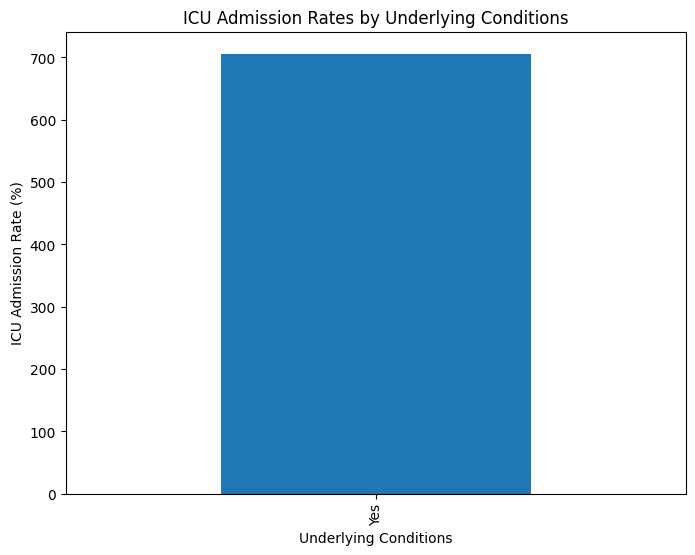

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

icu_by_conditions = (covid_data[covid_data['icu_yn'] == 'Yes']
                    .groupby('underlying_conditions_yn')
                    .count()
                    .loc[:, 'icu_yn'])

plt.figure(figsize=(8, 6))
icu_by_conditions.plot(kind='bar')
plt.title('ICU Admission Rates by Underlying Conditions')
plt.xlabel('Underlying Conditions')
plt.ylabel('ICU Admission Rate (%)')
plt.show()

**The graph indicates that there are 706 patients in the data who had underlying conditions and were admitted to the ICU.**

In [64]:
covid_data[covid_data['icu_yn'] == 'Yes'].groupby('age_group').count().loc[:, 'icu_yn']

age_group
0 - 17 years       12
18 to 49 years    133
50 to 64 years    174
65+ years         387
Name: icu_yn, dtype: int64

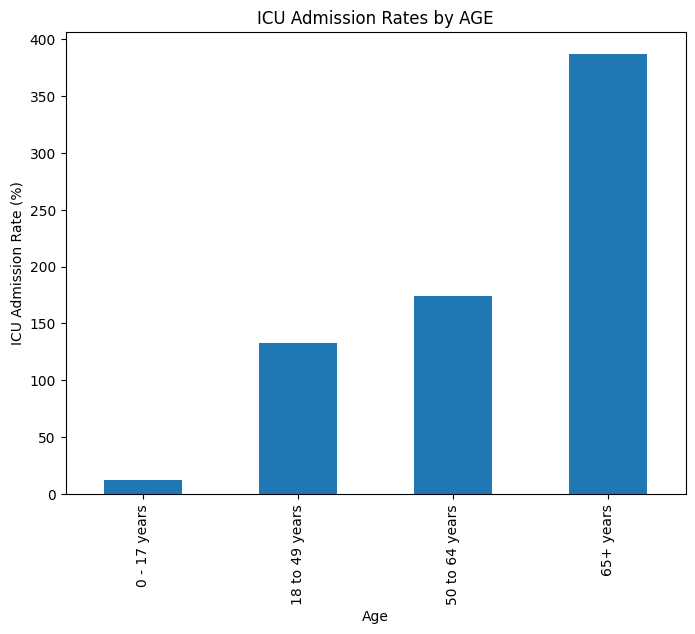

In [65]:

icu_by_age = (covid_data[covid_data['icu_yn'] == 'Yes']
              .groupby('age_group')
              .count()
              .loc[:, 'icu_yn']
              )
plt.figure(figsize=(8, 6))
icu_by_age.plot(kind='bar')
plt.title('ICU Admission Rates by AGE')
plt.xlabel('Age')
plt.ylabel('ICU Admission Rate (%)')
plt.show()

**Graph shows the distribution of ICU admissions by age group. Some key observations:**

There were 12 ICU admissions for patients aged 0-17 years.

There were 133 ICU admissions for patients aged 18-49 years.

There were 174 ICU admissions for patients aged 50-64 years.

There were 387 ICU admissions for patients aged 65 or older.

# 6. The rate of expected employment loss due to COVID-19 and sector of  employment.


****

In [66]:


filtered_data = household_data[household_data['expctloss'] == 1]
grouped_filtered = filtered_data.groupby('kindwork').size()
total_counts = household_data.groupby('kindwork').size()
percentages = ((grouped_filtered / total_counts)*100).round(2)
print(percentages)

kindwork
-99    27.94
-88    35.74
 1     20.53
 2     24.74
 3     21.70
 4     42.10
 5     33.63
dtype: float64


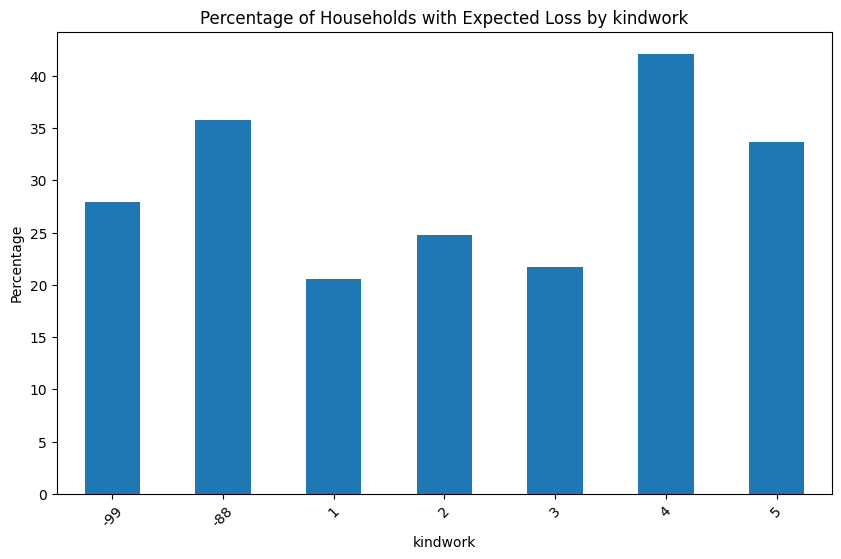

In [67]:
plt.figure(figsize=(10, 6))
percentages.plot(kind='bar')
plt.title('Percentage of Households with Expected Loss by kindwork')
plt.xlabel('kindwork')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

The range of values (20.53 to 42.10) indicates there is variability in this "kindwork" metric across the different categories.

# 7. The rate of expected employment loss due to COVID-19 relative to responders demographics.

In [69]:
def state_num_to_abb_alternative(num):
    state_abbreviations = {
        1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA',
        8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC', 12: 'FL',
        13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN',
        19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME',
        24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN', 28: 'MS',
        29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH',
        34: 'NJ', 35: 'NM', 36: 'NY', 37: 'NC', 38: 'ND',
        39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI',
        45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT',
        50: 'VT', 51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI',
        56: 'WY'
    }
    
    return state_abbreviations.get(num, 'Unknown')  # Fallback to 'Unknown' if num is not found


household_data['res_state'] = household_data['est_st'].apply(state_num_to_abb_alternative)

print(household_data['res_state'].unique())


['PA' 'GA' 'MA' 'VA' 'CA' 'FL' 'NJ' 'TX' 'WA' 'DC' 'NH' 'IN' 'AZ' 'NY'
 'DE' 'IL' 'MD' 'MI' 'WI']


# 8. The rate of expected employment loss due to COVID-19 for the top 10 states with the highest rate of COVID hospitalization.

In [70]:


(household_data[household_data['expctloss']==1].groupby(by="res_state").count().loc[:,'expctloss']\
/ household_data.groupby(by="res_state").count().loc[:,'expctloss'] )\
.map('{:.2%}'.format)

res_state
AZ    28.03%
CA    34.74%
DC    20.44%
DE    24.21%
FL    39.05%
GA    29.69%
IL    27.01%
IN    31.41%
MA    25.98%
MD    24.62%
MI    30.57%
NH    21.72%
NJ    30.14%
NY    34.16%
PA    27.50%
TX    33.36%
VA    22.75%
WA    25.98%
WI    25.11%
Name: expctloss, dtype: object

In [71]:
(covid_data.groupby(by="res_state").count().loc[:,['hosp_yn']] /covid_data.loc[:,['hosp_yn']].count())\
.map('{:.2%}'.format)

,hosp_yn
res_state,
AK,0.02%
CO,0.22%
GU,0.02%
IA,9.88%
ID,0.59%
IN,1.02%
KS,13.70%
KY,2.58%
LA,0.02%


In [72]:
import pandas as pd



expected_loss_rates = ((
    household_data[household_data['expctloss'] == 1].groupby(by="res_state").count().loc[:, 'expctloss'] /
    household_data.groupby(by="res_state").count().loc[:, 'expctloss']
)*100).round(2)

hospitalization_rates = ((
    covid_data.groupby(by="res_state").count().loc[:, ['hosp_yn']] /
    covid_data.loc[:, ['hosp_yn']].count()
)*100).round(2)

top_states = pd.merge(hospitalization_rates, expected_loss_rates, how="outer", on="res_state").sort_values(by=["hosp_yn"], ascending=[False]).iloc[:10, :1]


print(top_states)


           hosp_yn
res_state         
VA           28.45
NV           22.19
UT           14.52
KS           13.70
IA            9.88
OR            3.38
KY            2.58
ME            2.38
IN            1.02
ID            0.59


<Figure size 1000x600 with 0 Axes>

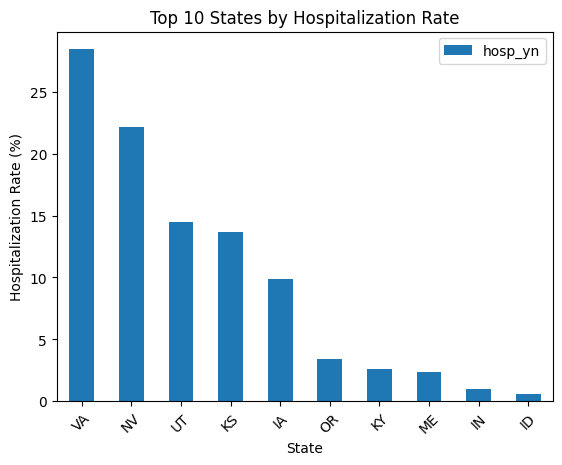

In [73]:
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar')
plt.title('Top 10 States by Hospitalization Rate')
plt.xlabel('State')
plt.ylabel('Hospitalization Rate (%)')
plt.xticks(rotation=45)
plt.show()

**the graph show:**
Virginia (VA) has the highest hospitalization rate at 28.45%.

Nevada (NV) has the second highest rate at 22.19%.

Utah (UT), Kansas (KS), and Iowa (IA) also have relatively high hospitalization rates compared to the other states.

Oregon (OR), Kentucky (KY), Maine (ME), Indiana (IN), and Idaho (ID) have the lowest hospitalization rates among the top 10 states.

# 9. The relationship between household income and the rate of delayed/ OR unobtained medical treatment (Due to COVID or otherwise).

In [74]:
delay_rates= (household_data[household_data['delay'] == 1].groupby(by="income").count().loc[:,['delay']]).round(2)
delay_rates

,delay
income,
-99,1444
-88,1249
1,6231
2,5045
3,6374
4,10760
5,9263
6,12718
7,7014


<Figure size 1000x600 with 0 Axes>

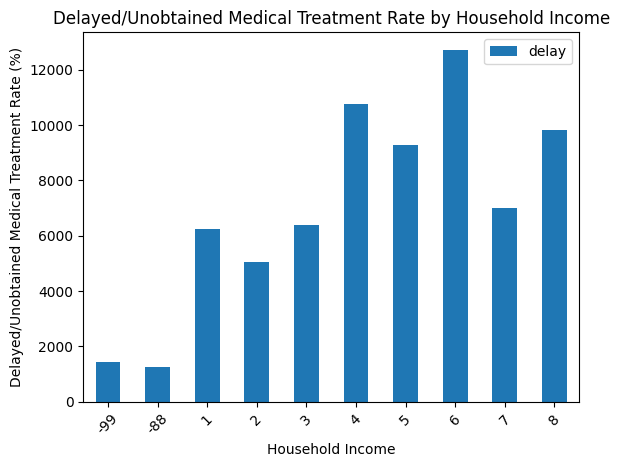

In [75]:
plt.figure(figsize=(10, 6))
delay_rates.plot(kind='bar')
plt.title('Delayed/Unobtained Medical Treatment Rate by Household Income')
plt.xlabel('Household Income')
plt.ylabel('Delayed/Unobtained Medical Treatment Rate (%)')
plt.xticks(rotation=45)
plt.show()

The graph show the counts for each income level, with the highest count of 12,718 for income level 6, and the lowest count of 1,249 for income level -88.

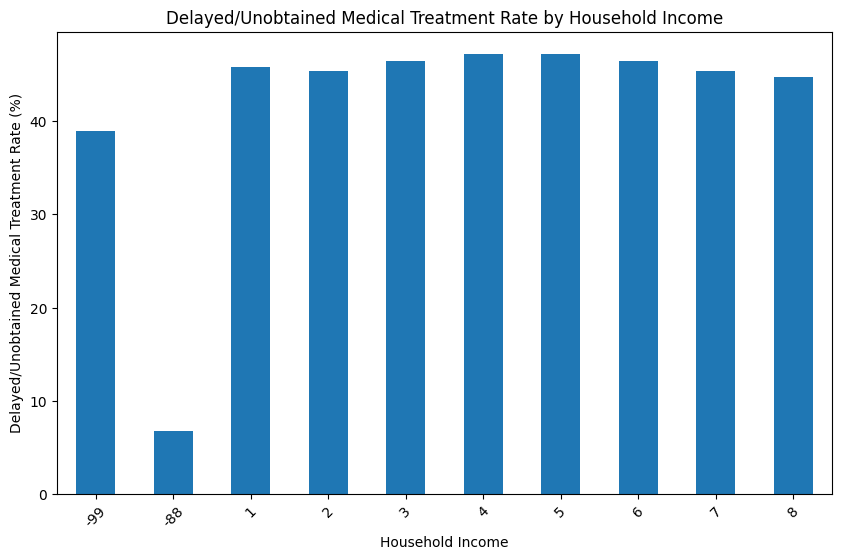

In [76]:
# Calculate the delay rates by income 
delay_rates = ((
    household_data[household_data['delay'] == 1]
    .groupby(by="income")
    .size() /
    household_data.groupby(by="income")
    .size()
) * 100).round(2)


# Create the bar plot
plt.figure(figsize=(10, 6))
delay_rates.plot(kind='bar')
plt.title('Delayed/Unobtained Medical Treatment Rate by Household Income')
plt.xlabel('Household Income')
plt.ylabel('Delayed/Unobtained Medical Treatment Rate (%)')
plt.xticks(rotation=45)
plt.show()

The highest percentage is 47.24% for income level 4, and the lowest is 6.75% for income level -88.

# 10. The relationship between COVID-19 symptom manifestation and age group.

In [77]:
symptom_percentage = (covid_data[covid_data['symptom_status'] == 'Symptomatic'].groupby(by="age_group").count().loc[:,['symptom_status']]).round(2)
symptom_percentage 

,symptom_status
age_group,
0 - 17 years,729
18 to 49 years,6060
50 to 64 years,3280
65+ years,4118


<Figure size 1000x600 with 0 Axes>

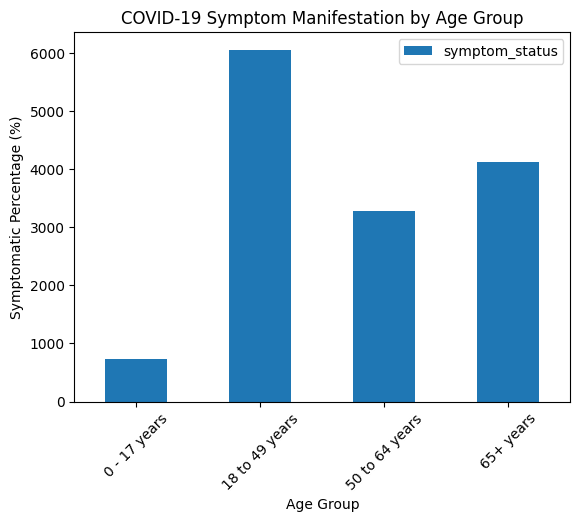

In [78]:
plt.figure(figsize=(10, 6))
symptom_percentage.plot(kind='bar')
plt.title('COVID-19 Symptom Manifestation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Symptomatic Percentage (%)')
plt.xticks(rotation=45)
plt.show()

graph  shows the counts for each age group, with the highest count of 6,060 for the 18 to 49 years age group, and the lowest count of 729 for the 0 - 17 years age group.